In [19]:
%pylab inline
from matplotlib import style
style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


/Users/segundo.martinez/miniconda3/envs/analysis/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['psd']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
from scipy import signal
from numpy import pi as PI

## Computing the power spectrum


To obtain the power spectrum of a signal, we must first define the **spectral resolution** or **frequency resolution**. 
It is the spacing between successive frequencies, and it is given by the ratio between the sampling rate and the total number of samples of the signal. 

<BR>
$$
\text{Spectral resolution} = \frac{\text{Sampling Rate}}{\text{Nsamples}}
$$
    
<BR>
Because the Welch method computes an estimate of the power spectrum by averaging the data into overlapping segments, 
it is important to define the length of the segment to obtain the appropiate spectral resolution.
<BR>
    
Finally, a filtering window is applied to avoid. A hamming window is generally applied.
    



In [21]:
%ls data

2019-06-06CM_ch25.npy  EEG.txt                EEGrestingState.mat


## A synthetic sine wave 

A 30 seconds **sine** signal sampled at 100 Hz

Nysquid frequency is 50 Hz


(0, 5)

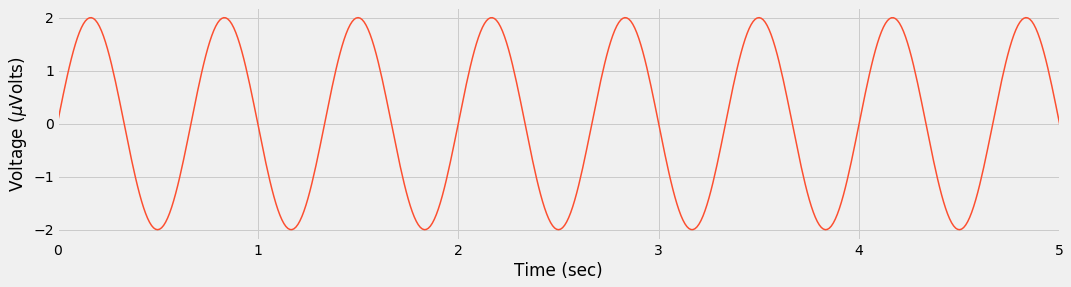

In [35]:
sr = 100
Nysquid = sr/2
print('Nysquid frequency is %d Hz'%Nysquid)
t = np.linspace(0,30,num=30*sr)
mysine = lambda f: np.sin(2*PI*f*t) 

sine = 2*mysine(1.5)
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(t, sine, lw = 1.5, color='C1')
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$Volts)');
plt.xlim(0,5)


The two normalizations necessary to obtain the amplitudes from the Fourier coefficients are:

    1) Divide the Fourier coefficients by the size of the signal
    2) multipy by two to obtain the amplitude of the negative frequencies
    
In addition, we can set the DC-component to zero.

In [36]:
# Fourier transform
FourierCoeff = np.fft.fft(sine)/sine.size
DC = [np.abs(FourierCoeff[0])]
amp = np.concatenate((DC, 2*np.abs(FourierCoeff[1:])))  

# compute frequencies vector until half the sampling rate
Nsamples = int( math.floor(sine.size/2) )
hz = np.linspace(0, sr/2., num = Nsamples + 1 )
dhz = hz[1]
print('Spectral resolution = %2.4f Hz'%dhz)

Spectral resolution = 0.0333 Hz


For the Welch's periodogram, the spectral resolution is given by the lenght of the segment. If we take a segment that correspond to the sampling rate, then the frequency resolution is 1 Hz. A larger segment (e.g., 4 times the size of the sampling rate) would give a higher frequency resolution (0.25 Hz). 

Welch's periodogram will return the power (amplitude to the square) versus frequency. We can also have the power density. Power density is the power per Hz, and if we take a segment which is four times the sampling rate, then the power will be multiplied by four to return power/Hz. In this case, when we add in Welch's, **scaling=density** and will obtain the power times 4, because our segment has a lenght of four times the sampling rate.

In [39]:
# Perform Welch's periodogram
segment = int( sr*4 ) 
myhann = signal.get_window('hann', segment)

# obtain simply Power (amplitude^2)
myparams = dict(fs = sr, nperseg = segment, window = np.ones(segment), 
                noverlap = 0, scaling = 'spectrum', return_onesided=True)
freq, ps = signal.welch(x = sine, **myparams)# units uV**2
ps = 2*ps

#obtain Power density (amplitude^2/Hz)
myparams = dict(fs = sr, nperseg = segment, window = np.ones(segment), 
                noverlap = 0, scaling = 'density', return_onesided=True)
freq, psd = signal.welch(x = sine, **myparams)# units uV**2/Hz
pd = 2*psd

dHz = freq[1]
print('Spectral resolution = %2.4f Hz'%dHz)

Spectral resolution = 0.2500 Hz


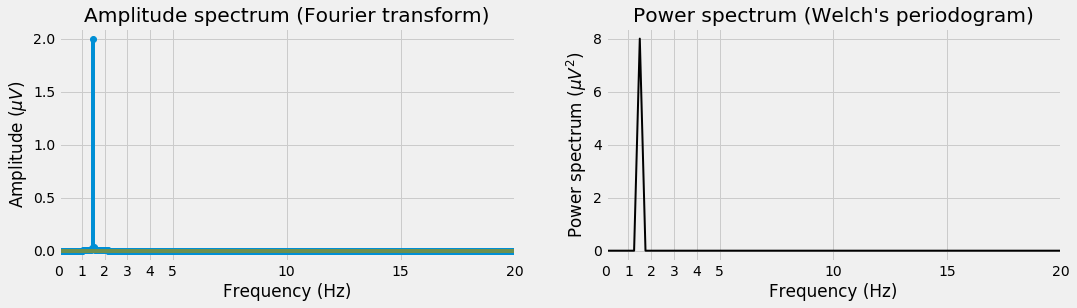

In [40]:
# Plot the power spectrum

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].set_title("Amplitude spectrum (Fourier transform)")
ax[0].stem(hz,amp[:len(hz)], use_line_collection = True)
ax[0].set_ylabel('Amplitude ($\mu V$)')

ax[1].set_title("Power spectrum (Welch's periodogram)")
ax[1].plot(freq, psd, color='k', lw=2) 
ax[1].set_ylabel('Power spectrum ($\mu V^2$)')

for myax in ax:
    myax.set_xlabel('Frequency (Hz)')
    myax.set_xlim(0,20)
    myticks = list(range(6)) + list(range(10, 25,5))
    myax.set_xticks(myticks)

In [41]:
# Sine wave has an amplitude of 2 uV, the power is 4 uV and the power density is 4*4 because
# we took a segment with size = 4x the sampling rate
print('Signal amplitude     = %2.4f uVolts'%amp[int(1.5/dhz)]) 
print('Signal power         = %2.4f uVolts^2'%ps[int(1.5/dHz)])
print('Singal power density = %2.4f uVolts^2/Hz'%pd[int(1.5/dHz)])

Signal amplitude     = 1.9989 uVolts
Signal power         = 3.9986 uVolts^2
Singal power density = 15.9945 uVolts^2/Hz


<H2>First example of EEG</H2>
<P> A 30 seconds voltage signal sampled at 100 Hz</P>

Nysquid frequency is 50 Hz


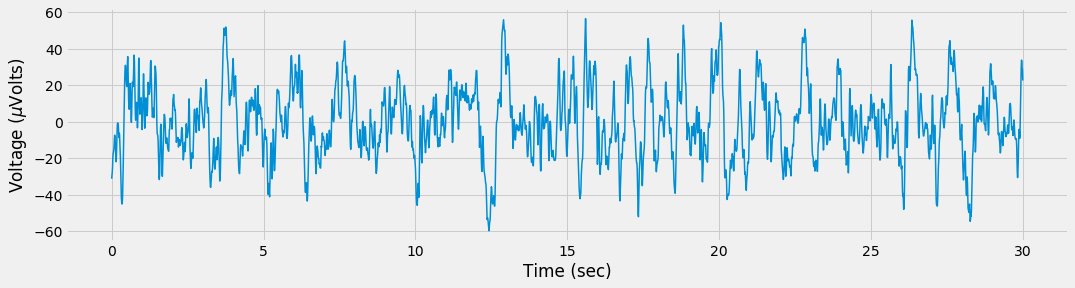

In [42]:
eeg = np.loadtxt('data/EEG.txt')
sr = 100 # samples per second
Nysquid = sr/2
print('Nysquid frequency is %d Hz'%Nysquid)
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(np.arange(eeg.size)/sr, eeg, lw = 1.5)
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$Volts)');

In [43]:
# Fourier transform
FourierCoeff = np.fft.fft(eeg)/eeg.size
DC = [np.abs(FourierCoeff[0])]
amp = np.concatenate((DC, 2*np.abs(FourierCoeff[1:])))  

# compute frequencies vector until half the sampling rate
Nsamples = int( math.floor(eeg.size/2) )
hz = np.linspace(0, sr/2., num = Nsamples + 1 )
print('Spectral resolution = %2.4f Hz'%hz[1])

Spectral resolution = 0.0333 Hz


In [45]:
# Perform Welch's periodogram with hann window and 50% overlap
segment = int( 5*sr ) 
myhann = signal.get_window('hann', segment)
myparams = dict(fs = sr, nperseg = segment, window = myhann, 
                noverlap = segment/2, scaling = 'spectrum', return_onesided=True)

freq, ps = signal.welch(x = eeg, **myparams)# units uV**2
ps = 2*ps
myparams2 = dict(fs = sr, nperseg = segment, window = myhann, 
                 noverlap = segment/2, scaling = 'density', return_onesided=True)
freq, psd = signal.welch(x = eeg, **myparams2)# units uV**2


print('Spectral resolution = %2.4f Hz'%freq[1])

Spectral resolution = 0.2000 Hz


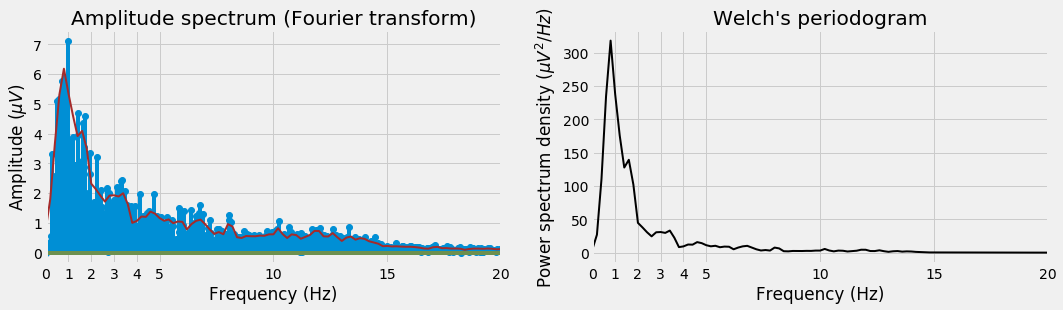

In [46]:
# Plot the power spectrum

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].set_title("Amplitude spectrum (Fourier transform)")
ax[0].stem(hz,amp[:len(hz)], use_line_collection = True)
ax[0].plot(freq, np.sqrt(ps/5), color='brown', lw = 2)
ax[0].set_ylabel('Amplitude ($\mu V$)')

ax[1].set_title("Welch's periodogram")
ax[1].plot(freq, psd, color='k', lw=2) # multiply by 2 the amplitudes to have the negative frequencies

ax[1].set_ylabel('Power spectrum density ($\mu V^2/Hz$)')

for myax in ax:
    myax.set_xlabel('Frequency (Hz)')
    myax.set_xlim(0,20)
    myticks = list(range(6)) + list(range(10, 25,5))
    myax.set_xticks(myticks)

In [21]:
# compute the signal at 1 Hz
print('Signal amplitude @1Hz     = %2.4f uVolts'%amp[int(1/dhz)]) 
print('Signal power @1Hz         = %2.4f uVolts^2'%ps[int(1/dHz)])
print('Singal power density @1Hz = %2.4f uVolts^2/Hz'%psd[int(1/dHz)])

Signal amplitude @1Hz     = 7.1204 uVolts


TypeError: unsupported operand type(s) for /: 'str' and 'int'

/Users/segundo.martinez/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


((0, 40), (1.0863943395344983e-05, 1000))

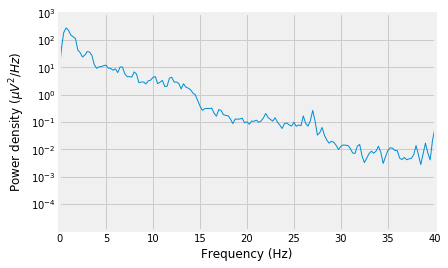

In [14]:
# plot in logaritmic scale
plt.semilogy(freq, psd, lw = 1)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Power density ($\mu V^2/Hz)$')
plt.xlim(0,40), plt.ylim(0,1000)